In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
reviews_df = pd.read_csv("/Users/benstan/Documents/dropbox_case/charlotte_review.csv")
people_df = pd.read_csv("/Users/benstan/Documents/dropbox_case/charlotte_reviewer.csv")
biz_df = pd.read_csv("/Users/benstan/Documents/dropbox_case/charlotte_business.csv")
YelpData = pd.read_csv("/Users/benstan/Documents/dropbox_case/charlotte_data_joined.csv")

### Step 1: Analyze business trends

In [3]:
biz_df.describe()

,business_latitude,business_longitude,business_review_count,business_stars,business_PriceRange
count,1381.000000,1381.000000,1381.000000,1381.000000,1318.000000
mean,35.195905,-80.833642,41.797972,3.455105,1.536419
std,0.079646,0.060150,60.637403,0.704909,0.585676
min,35.022629,-81.005212,3.000000,1.000000,1.000000
25%,35.145939,-80.858623,8.000000,3.000000,1.000000
50%,35.207797,-80.841644,19.000000,3.500000,1.000000
75%,35.229054,-80.795903,51.000000,4.000000,2.000000
max,35.384064,-80.654628,762.000000,5.000000,4.000000


In [4]:
print biz_df.shape
biz_df.head()

(1381, 23)


,business_id,business_city,business_full_address,business_latitude,business_longitude,business_name,business_review_count,business_stars,business_state,business_Take-out,business_Alcohol,business_NoiseLevel,business_Attire,business_Delivery,business_HasTV,business_TakesReservations,business_WheelchairAccessible,business_WaiterService,business_AcceptsCreditCards,business_GoodforKids,business_GoodForGroups,business_PriceRange,business_categories
0,Gw5POFxBRoJxN_ZYhk6lgQ,Charlotte,8706 Pineville-Matthews Road\nSuite 100\nCharl...,35.089035,-80.867055,Bruegger's Bagels,9,4.0,NC,True,none,average,casual,False,False,False,True,False,True,True,True,2,"[Food, Sandwiches, Bagels, Breakfast & Brunch,..."
1,MMgjU4K0D9RLsb7BWEic4g,Charlotte,"8510 Park Rd\nCharlotte, NC 28210",35.117183,-80.857545,Domino's Pizza,4,4.5,NC,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"[Sandwiches, Pizza, Chicken Wings, Restaurants]"
2,LT0AgHTpDifuHSXgyLmJwg,Charlotte,"309 W 4th St\nCharlotte, NC 28202",35.228193,-80.846592,Green's Lunch,32,3.5,NC,True,none,average,casual,False,False,False,True,False,True,True,True,1,"[Hot Dogs, Restaurants]"
3,USdRzNk14UdjZWFgBJb0wA,Charlotte,"511 N Church St\nFourth Ward\nCharlotte, NC 28202",35.231684,-80.839638,McNinch House Restaurant,25,4.5,NC,False,full_bar,quiet,formal,False,False,True,NaN,True,True,False,False,4,"[American (New), Southern, French, Restaurants]"
4,ePP0Eqz8JKSbtdt2phiB4A,Charlotte,"401 W 9th St\nFourth Ward\nCharlotte, NC 28202",35.233610,-80.840783,Alexander Michael's,175,4.0,NC,True,full_bar,average,casual,False,True,False,False,True,True,False,True,2,"[Cajun/Creole, American (Traditional), Bars, P..."


In [5]:
biz_df.isnull().sum() #Many null values in the 'additional details' fields for the restaurants

business_id                        0
business_city                      0
business_full_address              0
business_latitude                  0
business_longitude                 0
business_name                      0
business_review_count              0
business_stars                     0
business_state                     0
business_Take-out                 55
business_Alcohol                 187
business_NoiseLevel              209
business_Attire                   78
business_Delivery                 89
business_HasTV                   142
business_TakesReservations        71
business_WheelchairAccessible    677
business_WaiterService           160
business_AcceptsCreditCards       59
business_GoodforKids              72
business_GoodForGroups            65
business_PriceRange               63
business_categories                0
dtype: int64

In [6]:
biz_df.dropna().shape # Over half of the data set has a null value

(635, 23)

In [7]:
biz_df.corr()

,business_latitude,business_longitude,business_review_count,business_stars,business_PriceRange
business_latitude,1.000000,0.215515,-0.013811,-0.003709,-0.065143
business_longitude,0.215515,1.000000,-0.019010,0.063476,0.015303
business_review_count,-0.013811,-0.019010,1.000000,0.235096,0.338611
business_stars,-0.003709,0.063476,0.235096,1.000000,0.084705
business_PriceRange,-0.065143,0.015303,0.338611,0.084705,1.000000


Slight correlation exists between number of stars and review count (0.24) 

Correlation exists between price range and review count (0.34)

Weak correlation between number of stars and price range (0.08)

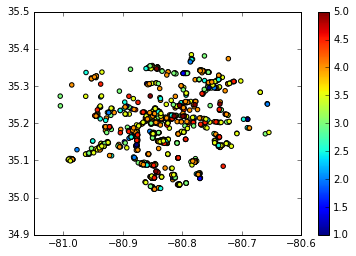

In [8]:
plt.scatter(biz_df['business_longitude'],biz_df['business_latitude'],c=biz_df['business_stars'])
plt.colorbar()

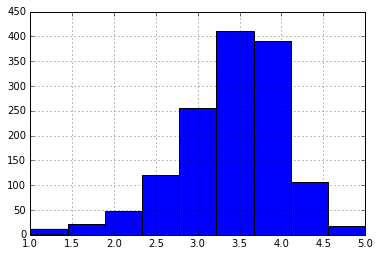

In [9]:
biz_df['business_stars'].hist(bins=9)

In [10]:
biz_df['business_PriceRange'].value_counts()/len(biz_df)*100 #Percentages by price range

1    48.370746
2    43.301955
3     3.403331
4     0.362056
Name: business_PriceRange, dtype: float64

In [11]:
#np.unique(biz_df['business_categories'].str.replace("[","").str.replace("]","").str.split(pat=',',expand=True))
biz_df['business_categories'].str.replace("[","").str.replace("]","").str.replace(" ","").str.split(pat=',',expand=True).stack().value_counts()[:16]

Restaurants              1381
FastFood                  181
Sandwiches                167
American(Traditional)     165
Nightlife                 146
Bars                      142
American(New)             129
Burgers                   127
Pizza                     126
Mexican                   105
Chinese                    97
Food                       87
Italian                    77
Breakfast&Brunch           71
ChickenWings               68
Delis                      61
dtype: int64

In looking at all restaurant categories, American food appears to be the most common 

In [12]:
top_restaurants = biz_df[(biz_df['business_review_count']>=20)&(biz_df['business_stars']>=4.0)]
top_restaurants['business_categories'].str.replace("[","").str.replace("]","").str.replace(" ","").str.split(pat=',',expand=True).stack().value_counts()[:16]

Restaurants              299
American(New)             45
Nightlife                 35
Pizza                     33
Bars                      32
Italian                   31
Food                      26
American(Traditional)     26
Sandwiches                26
Burgers                   24
Breakfast&Brunch          22
Southern                  21
Mexican                   17
Vietnamese                12
SushiBars                 12
Mediterranean             11
dtype: int64

When looking at the highly rated restaurants (rated four stars or higher), the prevalence of American food increases

### Step 2: Analyze reviewer trends

In [13]:
print people_df.shape
people_df.head()

(16518, 14)


,reviewer_id,reviewer_average_stars,reviewer_fans,reviewer_name,reviewer_review_count,reviewer_yelper_since,reviewer_funny_votes,reviewer_useful_votes,reviewer_cool_votes,reviewer_total_votes,reviewer_num_friends,reviewer_years_elite,reviewer_currently_elite,reviewer_num_compliments
0,whKpnugMnWTz3UjlrN71yg,3.87,15,Todd,291,2007-07,0,0,0,0,113,3,0,314
1,4522K1jh68XVpUsPh-5I7A,3.80,5,Holly,113,2010-12,0,0,0,0,1,2,0,23
2,FdaMP9RQHCY7WMFPq80LCg,3.67,6,Brian,401,2011-06,0,0,0,0,45,5,1,113
3,PM2jXrlVzik1jDwwahLJJQ,3.74,25,Candyce,505,2011-09,0,0,0,0,116,4,1,279
4,naBs2Kg2KClrKcoRgFE2eA,3.69,5,Elizabeth,108,2012-01,0,0,0,0,34,3,0,48


In [14]:
people_df['current_date']=pd.to_datetime("2015-01-08") #Date of most recent review
people_df['reviewer_yelper_since'] = pd.to_datetime(people_df['reviewer_yelper_since']+"-01")
people_df['reviewer_months_as_yelper'] = ((people_df['current_date'] - people_df['reviewer_yelper_since'])/np.timedelta64(1, 'M')).astype(float)
people_df['reviewer_reviews_per_month'] = people_df['reviewer_review_count']/people_df['reviewer_months_as_yelper']

In [15]:
people_df.describe()

,reviewer_average_stars,reviewer_fans,reviewer_review_count,reviewer_funny_votes,reviewer_useful_votes,reviewer_cool_votes,reviewer_total_votes,reviewer_num_friends,reviewer_years_elite,reviewer_currently_elite,reviewer_num_compliments,reviewer_months_as_yelper,reviewer_reviews_per_month
count,16518.000000,16518.000000,16518.000000,16518,16518,16518,16518,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000
mean,3.709490,2.286233,45.338419,0,0,0,0,8.182347,0.359789,0.059995,34.964160,38.002388,1.038333
std,0.902253,18.212466,140.627383,0,0,0,0,55.806071,1.199553,0.237485,497.544092,21.942699,2.461923
min,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.229984,0.000000
25%,3.330000,0.000000,3.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,20.271463,0.110379
50%,3.820000,0.000000,8.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,36.238937,0.284555
75%,4.250000,1.000000,26.000000,0,0,0,0,3.000000,0.000000,0.000000,3.000000,52.239266,0.845469
max,5.000000,1075.000000,4323.000000,0,0,0,0,2720.000000,11.000000,1.000000,41095.000000,123.238670,64.423460


In [16]:
people_df.head()

,reviewer_id,reviewer_average_stars,reviewer_fans,reviewer_name,reviewer_review_count,reviewer_yelper_since,reviewer_funny_votes,reviewer_useful_votes,reviewer_cool_votes,reviewer_total_votes,reviewer_num_friends,reviewer_years_elite,reviewer_currently_elite,reviewer_num_compliments,current_date,reviewer_months_as_yelper,reviewer_reviews_per_month
0,whKpnugMnWTz3UjlrN71yg,3.87,15,Todd,291,2007-07-01,0,0,0,0,113,3,0,314,2015-01-08,90.285221,3.223119
1,4522K1jh68XVpUsPh-5I7A,3.80,5,Holly,113,2010-12-01,0,0,0,0,1,2,0,23,2015-01-08,49.249471,2.294441
2,FdaMP9RQHCY7WMFPq80LCg,3.67,6,Brian,401,2011-06-01,0,0,0,0,45,5,1,113,2015-01-08,43.269882,9.267416
3,PM2jXrlVzik1jDwwahLJJQ,3.74,25,Candyce,505,2011-09-01,0,0,0,0,116,4,1,279,2015-01-08,40.247233,12.547446
4,naBs2Kg2KClrKcoRgFE2eA,3.69,5,Elizabeth,108,2012-01-01,0,0,0,0,34,3,0,48,2015-01-08,36.238937,2.980220


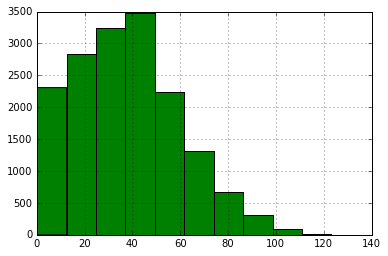

In [17]:
people_df['reviewer_months_as_yelper'].hist(color='green') #A lot of new yelpers!

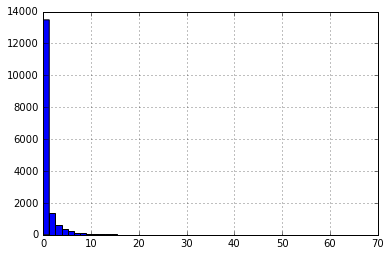

In [18]:
people_df['reviewer_reviews_per_month'].hist(bins=50) #Most people have little activity on the service

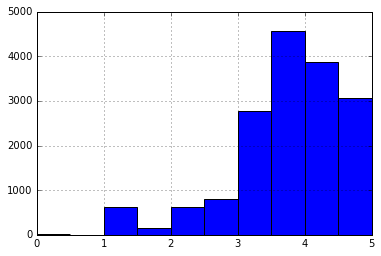

In [19]:
people_df['reviewer_average_stars'].hist() #Similar trend to restaurant ratings; mostly above average to great reviews

In [20]:
float(people_df['reviewer_currently_elite'].sum())/float(len(people_df)) #Six percent of people are elite

0.0599951567986439

### Step 3: Analyze review trends

In [21]:
reviews_df.head()

,review_date,review_id,review_stars,review_text,review_funny_votes,review_useful_votes,review_cool_votes,review_total_votes,reviewer_id,business_id
0,2010-12-31,5jK4kzMbk5_2uFlW6SBqdQ,4,In the Pineville area and need a quick breakfa...,1,1,1,3,whKpnugMnWTz3UjlrN71yg,Gw5POFxBRoJxN_ZYhk6lgQ
1,2011-07-18,GLBryAnx1thVohzWc1nV_A,5,I came here for the first time and was so happ...,0,0,0,0,4522K1jh68XVpUsPh-5I7A,Gw5POFxBRoJxN_ZYhk6lgQ
2,2011-07-29,EHERBq_z1IdCvU56L32nVQ,4,I would definitely need some bad service for a...,0,0,0,0,FdaMP9RQHCY7WMFPq80LCg,Gw5POFxBRoJxN_ZYhk6lgQ
3,2012-09-19,ZXPMc6Lc4V7nqknsJ13u9A,4,This place is an awesome!\n\nThe bagels are fr...,0,0,0,0,PM2jXrlVzik1jDwwahLJJQ,Gw5POFxBRoJxN_ZYhk6lgQ
4,2012-12-29,DttWnjejrfXUDiZzC0aFAg,3,I have mixed feelings about Bruegger's but I s...,0,0,0,0,naBs2Kg2KClrKcoRgFE2eA,Gw5POFxBRoJxN_ZYhk6lgQ


In [22]:
reviews_df.describe()

,review_stars,review_funny_votes,review_useful_votes,review_cool_votes,review_total_votes
count,54222.000000,54222.000000,54222.000000,54222.000000,54222.000000
mean,3.706189,0.332780,0.867065,0.401166,1.601011
std,1.187673,0.926539,1.473043,0.963986,2.973489
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,1.000000,0.000000,2.000000
max,5.000000,23.000000,40.000000,40.000000,82.000000


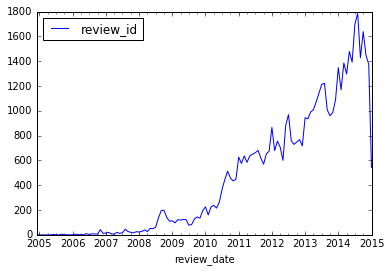

In [23]:
#reviews_df[['review_date','review_id']].groupby('review_date').count().plot(kind='line')
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])
reviews_df[['review_date','review_id']].set_index('review_date').resample('M','count').plot()

Number of reviews has grown over time

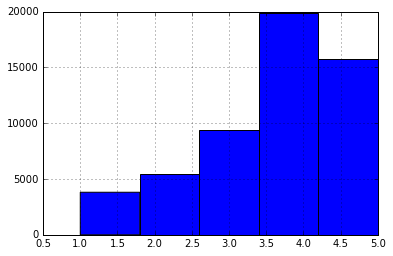

In [24]:
reviews_df['review_stars'].hist(bins=5)